# Univariate Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = "svg"
import plotly.express as px

In [2]:
df = pd.read_csv('./../../data/data.csv')

In [3]:
df.shape

(20632, 27)

In [4]:
df.columns

Index(['index', 'id', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug',
       'disable_communication', 'country', 'currency',
       'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at',
       'launched_at', 'staff_pick', 'backers_count', 'static_usd_rate',
       'usd_pledged', 'category', 'spotlight', 'source_url', 'name_len',
       'name_len_clean', 'blurb_len', 'blurb_len_clean'],
      dtype='object')

## Numerical Variables

<AxesSubplot: xlabel='goal', ylabel='Count'>

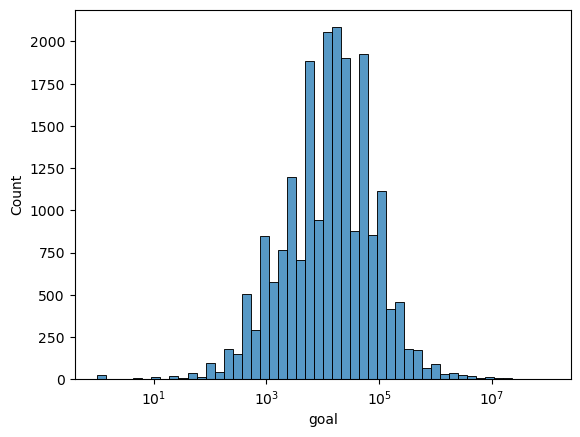

In [5]:
sns.histplot(df['goal'], bins=50, log_scale=True)

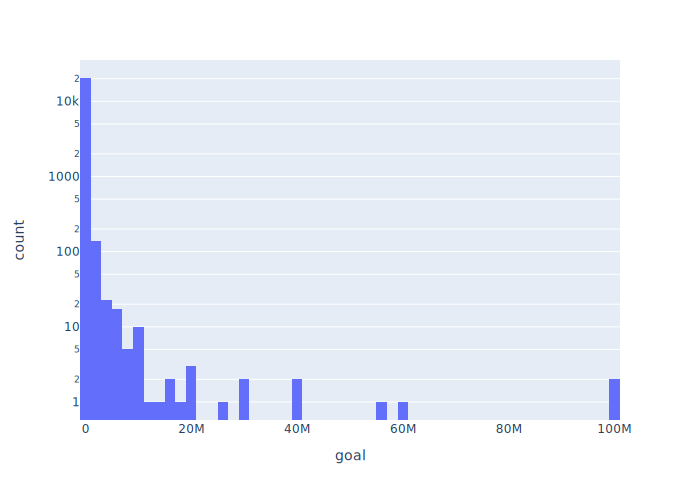

In [12]:
fig = px.histogram(df, x='goal', nbins=50, log_y=True)
fig.show()

<AxesSubplot: xlabel='pledged', ylabel='Count'>

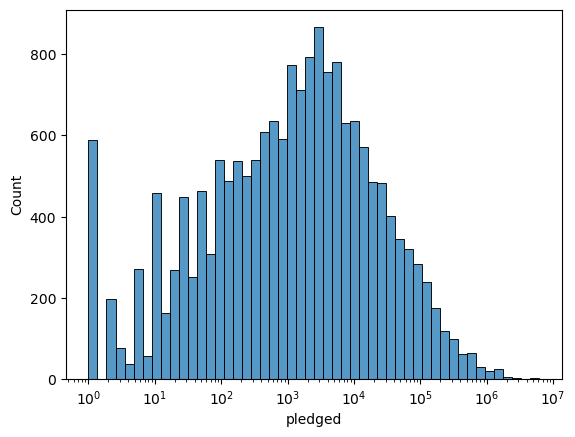

In [6]:
sns.histplot(df[df['pledged']>0]['pledged'], bins=50, log_scale=True)

<AxesSubplot: xlabel='name_len', ylabel='Count'>

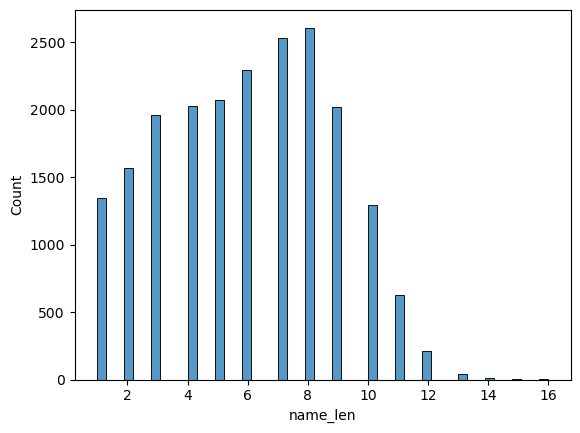

In [12]:
sns.histplot(df['name_len'], bins=50, log_scale=False)

<AxesSubplot: xlabel='blurb_len', ylabel='Count'>

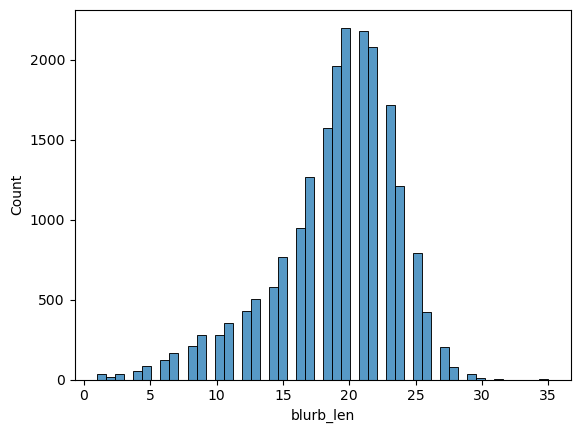

In [13]:
sns.histplot(df['blurb_len'], bins=50, log_scale=False)

## Categorical Variables

In [7]:
def get_value_counts(df, column):
    tmp_cnt = pd.DataFrame(df[column].value_counts()).reset_index()
    tmp_cnt.columns = [column, 'counts']
    tmp_cnt['percentage'] = tmp_cnt['counts'].apply(lambda x: round(x*100/sum(tmp_cnt['counts']), 2))
    return tmp_cnt.copy()


<AxesSubplot: xlabel='state', ylabel='percentage'>

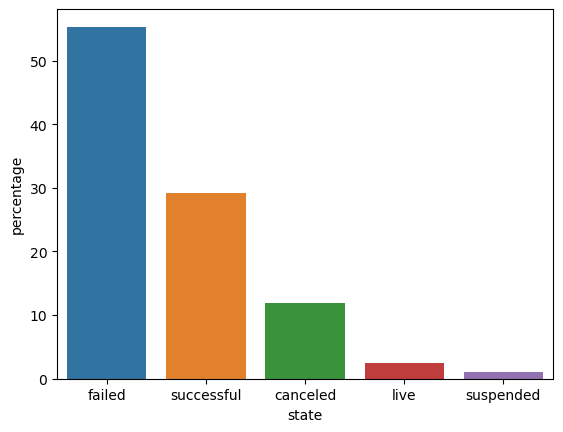

In [8]:
sns.barplot(get_value_counts(df, 'state'), x='state', y='percentage')

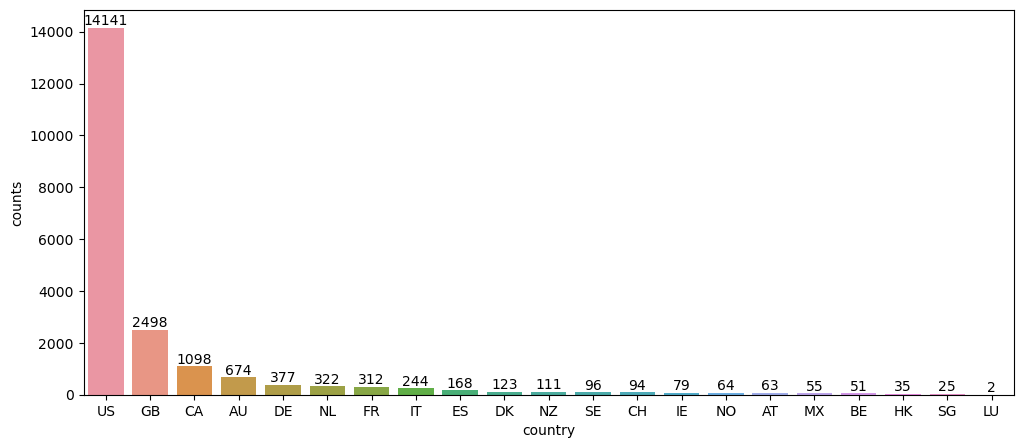

In [9]:
plt.figure(figsize=(12,5))
ax = sns.barplot(get_value_counts(df, 'country'), x='country', y='counts')
for container in ax.containers:
    ax.bar_label(container)

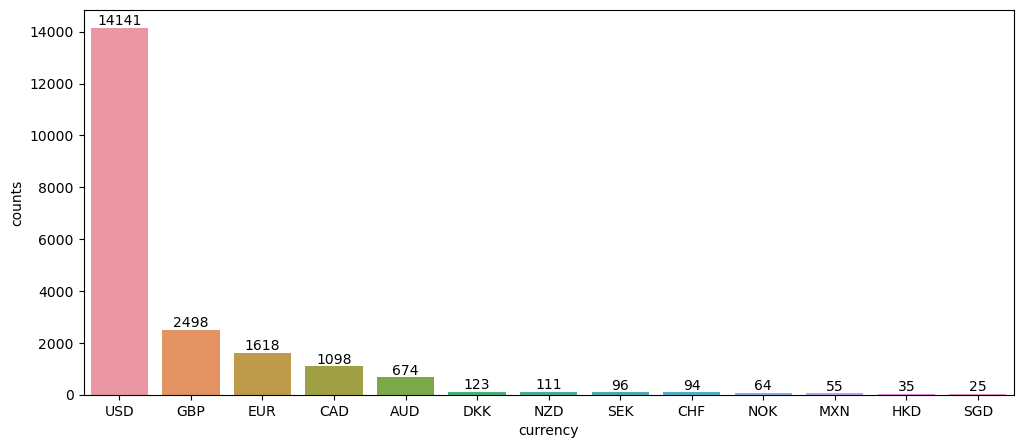

In [10]:
plt.figure(figsize=(12,5))
ax = sns.barplot(get_value_counts(df, 'currency'), x='currency', y='counts')
for container in ax.containers:
    ax.bar_label(container)

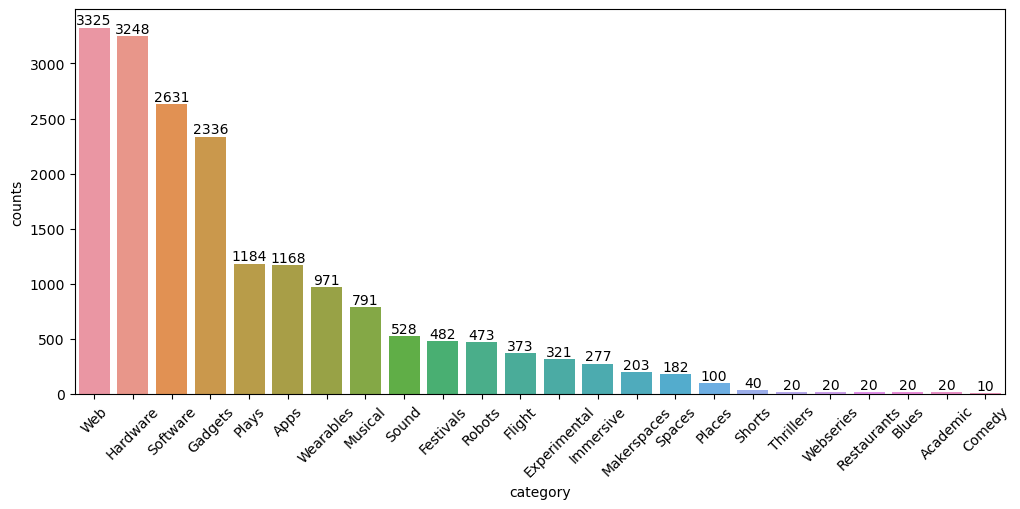

In [11]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=45)
ax = sns.barplot(get_value_counts(df, 'category'), x='category', y='counts')
for container in ax.containers:
    ax.bar_label(container)